Python-天然地震数据练习
---

获取数据
[网站]
https://news.ceic.ac.cn/index.html?time=1637318776

In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# file1=pd.read_excel('D:/code/Python Code/data/earthquake_data/earthquake_data.xlsx')
file1=pd.read_excel('D:/code/Python Code/data/earthquake_data/earthquake_311.xlsx')
data=file1
# print(data,data.size,type(data))
# print(data.iloc[:,0])
print(data.head())
print(type(data))
print(data.shape)

                  发震时刻  震级(M)  纬度(°)   经度(°)  深度(千米)      参考位置
0  2023-03-10 17:18:39    5.5   6.85  -73.20   150.0      哥伦比亚
1  2023-03-08 15:33:06    5.8  -6.45  155.20    60.0     所罗门群岛
2  2023-03-08 14:03:32    5.7  50.00  157.35    10.0      千岛群岛
3  2023-03-08 13:21:07    3.4  23.84  114.51     8.0  广东河源市东源县
4  2023-03-08 05:15:33    4.5  23.84  114.52    10.0  广东河源市东源县
<class 'pandas.core.frame.DataFrame'>
(11104, 6)


data时间转换,将发生时间分割

In [36]:
from datetime import datetime
data_time=data.iloc[:,0]
data_time=pd.to_datetime(data_time)

data['year']=data_time.dt.year
data['month']=data_time.dt.month
data['day']=data_time.dt.day
data['hour']=data_time.dt.hour
data['minute']=data_time.dt.minute
data['secend']=data_time.dt.second
print(data.head())
file_data=open('D:/code/Python Code/data/temp/2.csv','w')
print(data.head(),file=file_data)
print(data.shape)

                  发震时刻  震级(M)  纬度(°)   经度(°)  深度(千米)      参考位置  year  month  \
0  2023-03-10 17:18:39    5.5   6.85  -73.20   150.0      哥伦比亚  2023      3   
1  2023-03-08 15:33:06    5.8  -6.45  155.20    60.0     所罗门群岛  2023      3   
2  2023-03-08 14:03:32    5.7  50.00  157.35    10.0      千岛群岛  2023      3   
3  2023-03-08 13:21:07    3.4  23.84  114.51     8.0  广东河源市东源县  2023      3   
4  2023-03-08 05:15:33    4.5  23.84  114.52    10.0  广东河源市东源县  2023      3   

   day  hour  minute  secend  
0   10    17      18      39  
1    8    15      33       6  
2    8    14       3      32  
3    8    13      21       7  
4    8     5      15      33  
(11104, 12)


制作年份序列

In [37]:
n1=max(data['year']);n2=min(data['year'])
number_year=n1-n2+1
print(number_year,n1,n2)
x=np.arange(n2,n1+1)
print(x)

12 2023 2012
[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


统计年份中的次数count

dict_keys([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]) dict_values([710, 1071, 961, 943, 902, 810, 910, 1148, 1051, 1188, 1192, 218])


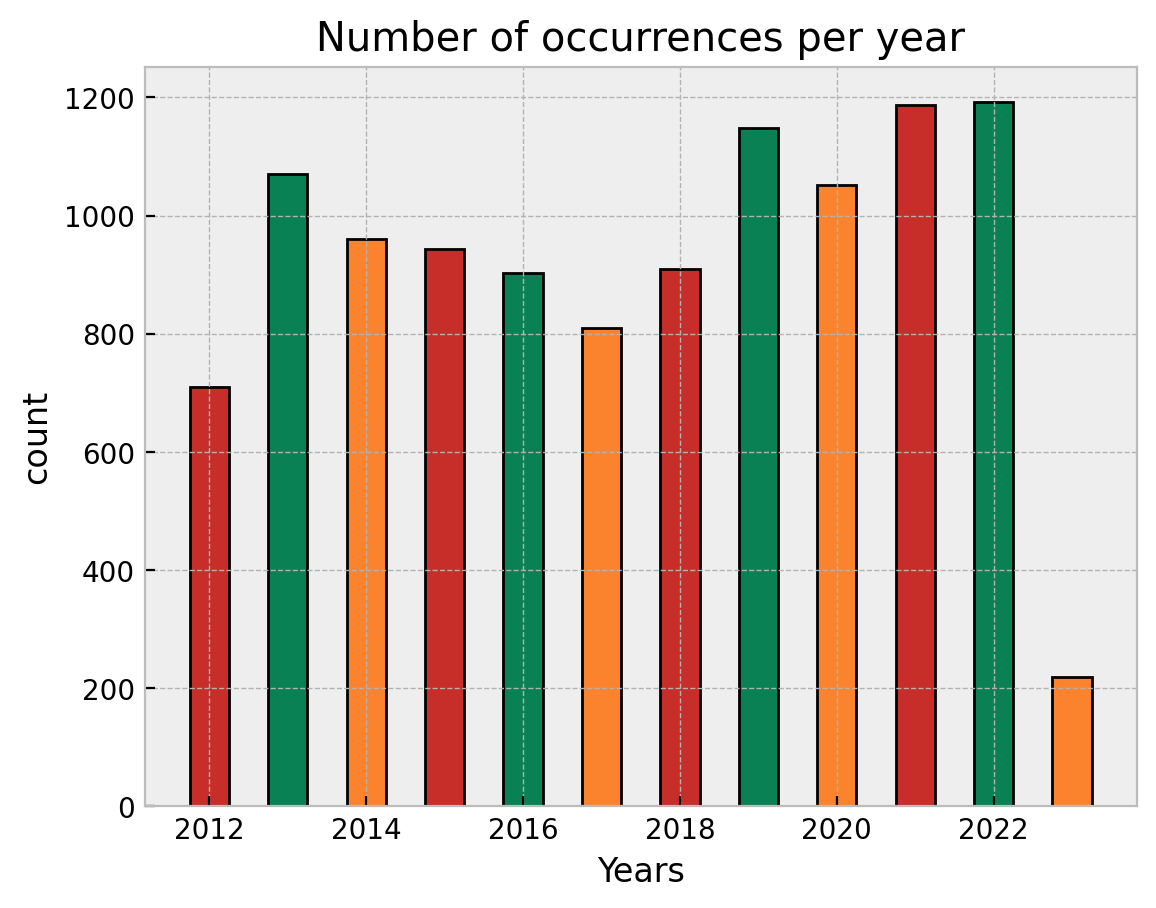

In [38]:
# sourcery skip: avoid-builtin-shadow
count=0;dicc={}
for i in x:
    for j in data['year']:
        if i ==j:
            count+=1
    dicc[i]=count
    count=0
# print(dicc)
# print(dicc.keys(),dicc.values())
year=dicc.keys();count=dicc.values()
print(year,count)
import matplotlib.pyplot as plt
plt.style.use('bmh')#样式
fig,ax=plt.subplots()
colors =['#c72e29','#098154','#fb832d']#
ax.bar(year,count,width=0.5,edgecolor='black',linewidth=1,color=colors)

ax.set_ylabel('count')
ax.set_xlabel('Years')
ax.set_title('Number of occurrences per year')
plt.show()

绘制地震发生位置

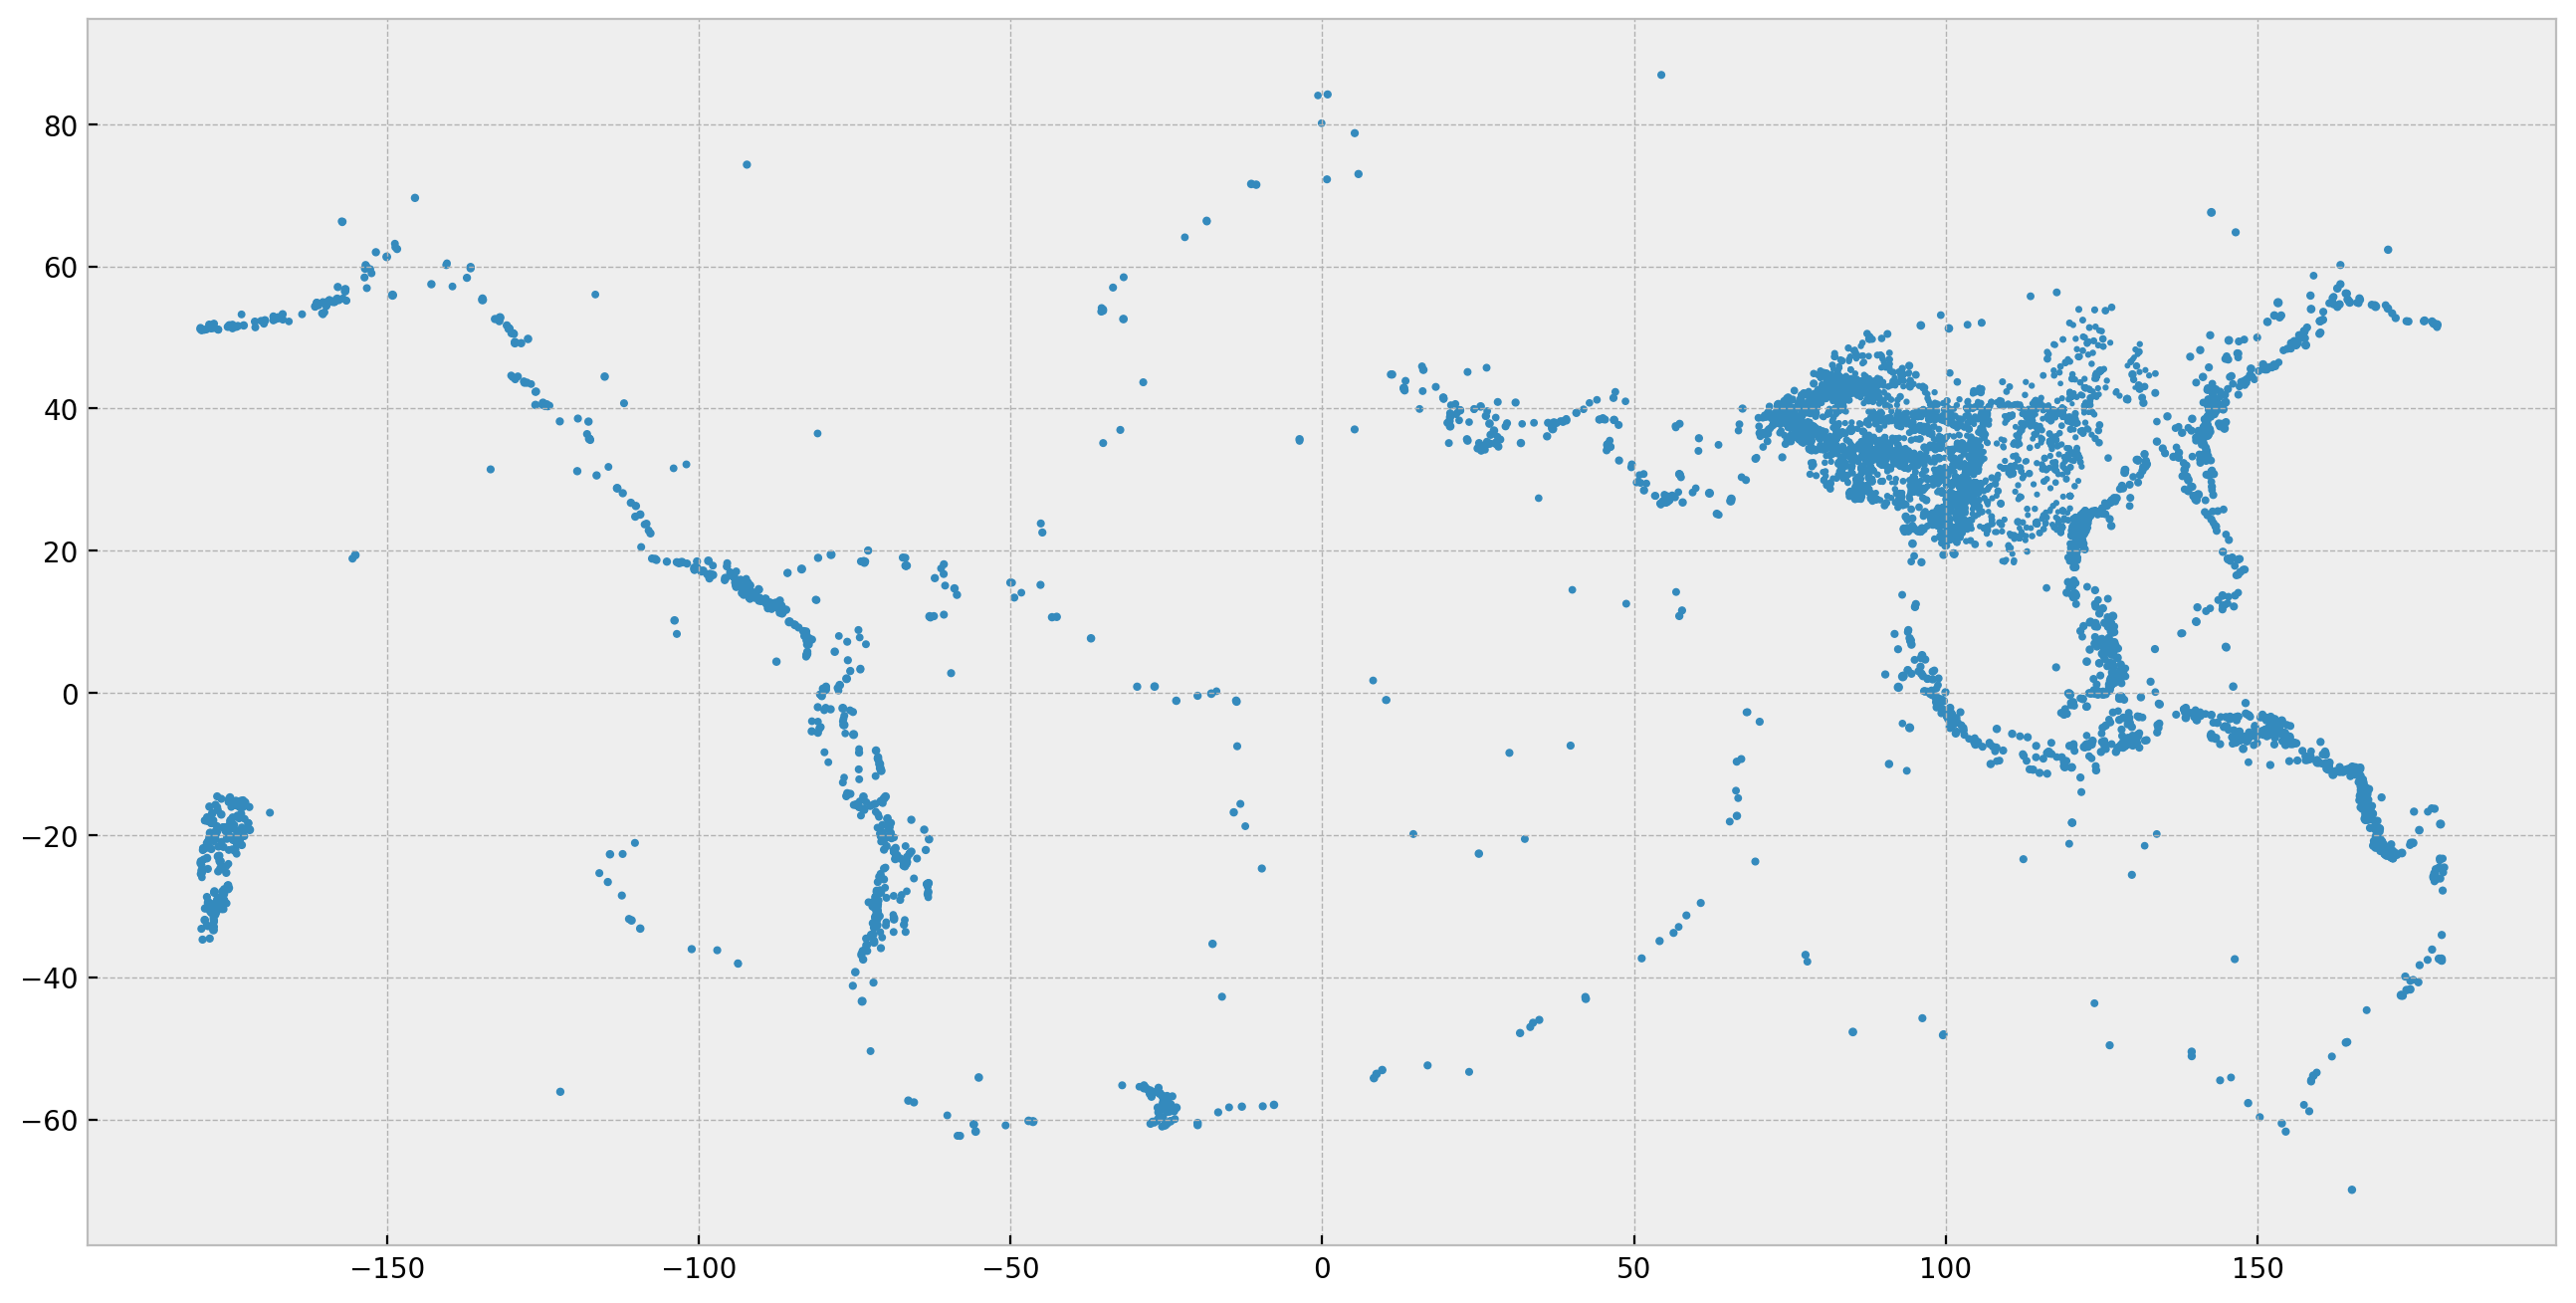

In [39]:
longitude=data.iloc[:,3]#经度
latitude=data.iloc[:,2]#纬度
deepth=data.iloc[:,4]#震源深度
# magnitude=data.iloc[:,1]#地震等级
magnitude=data['震级(M)']
# print(longitude,latitude,deepth)
%config InlineBackend.figure_format='retina'
fig,ax=plt.subplots(figsize=(16,8))
ax.scatter(longitude,latitude,s=magnitude)
plt.show()

pandas数据筛选不同等级的地震分布

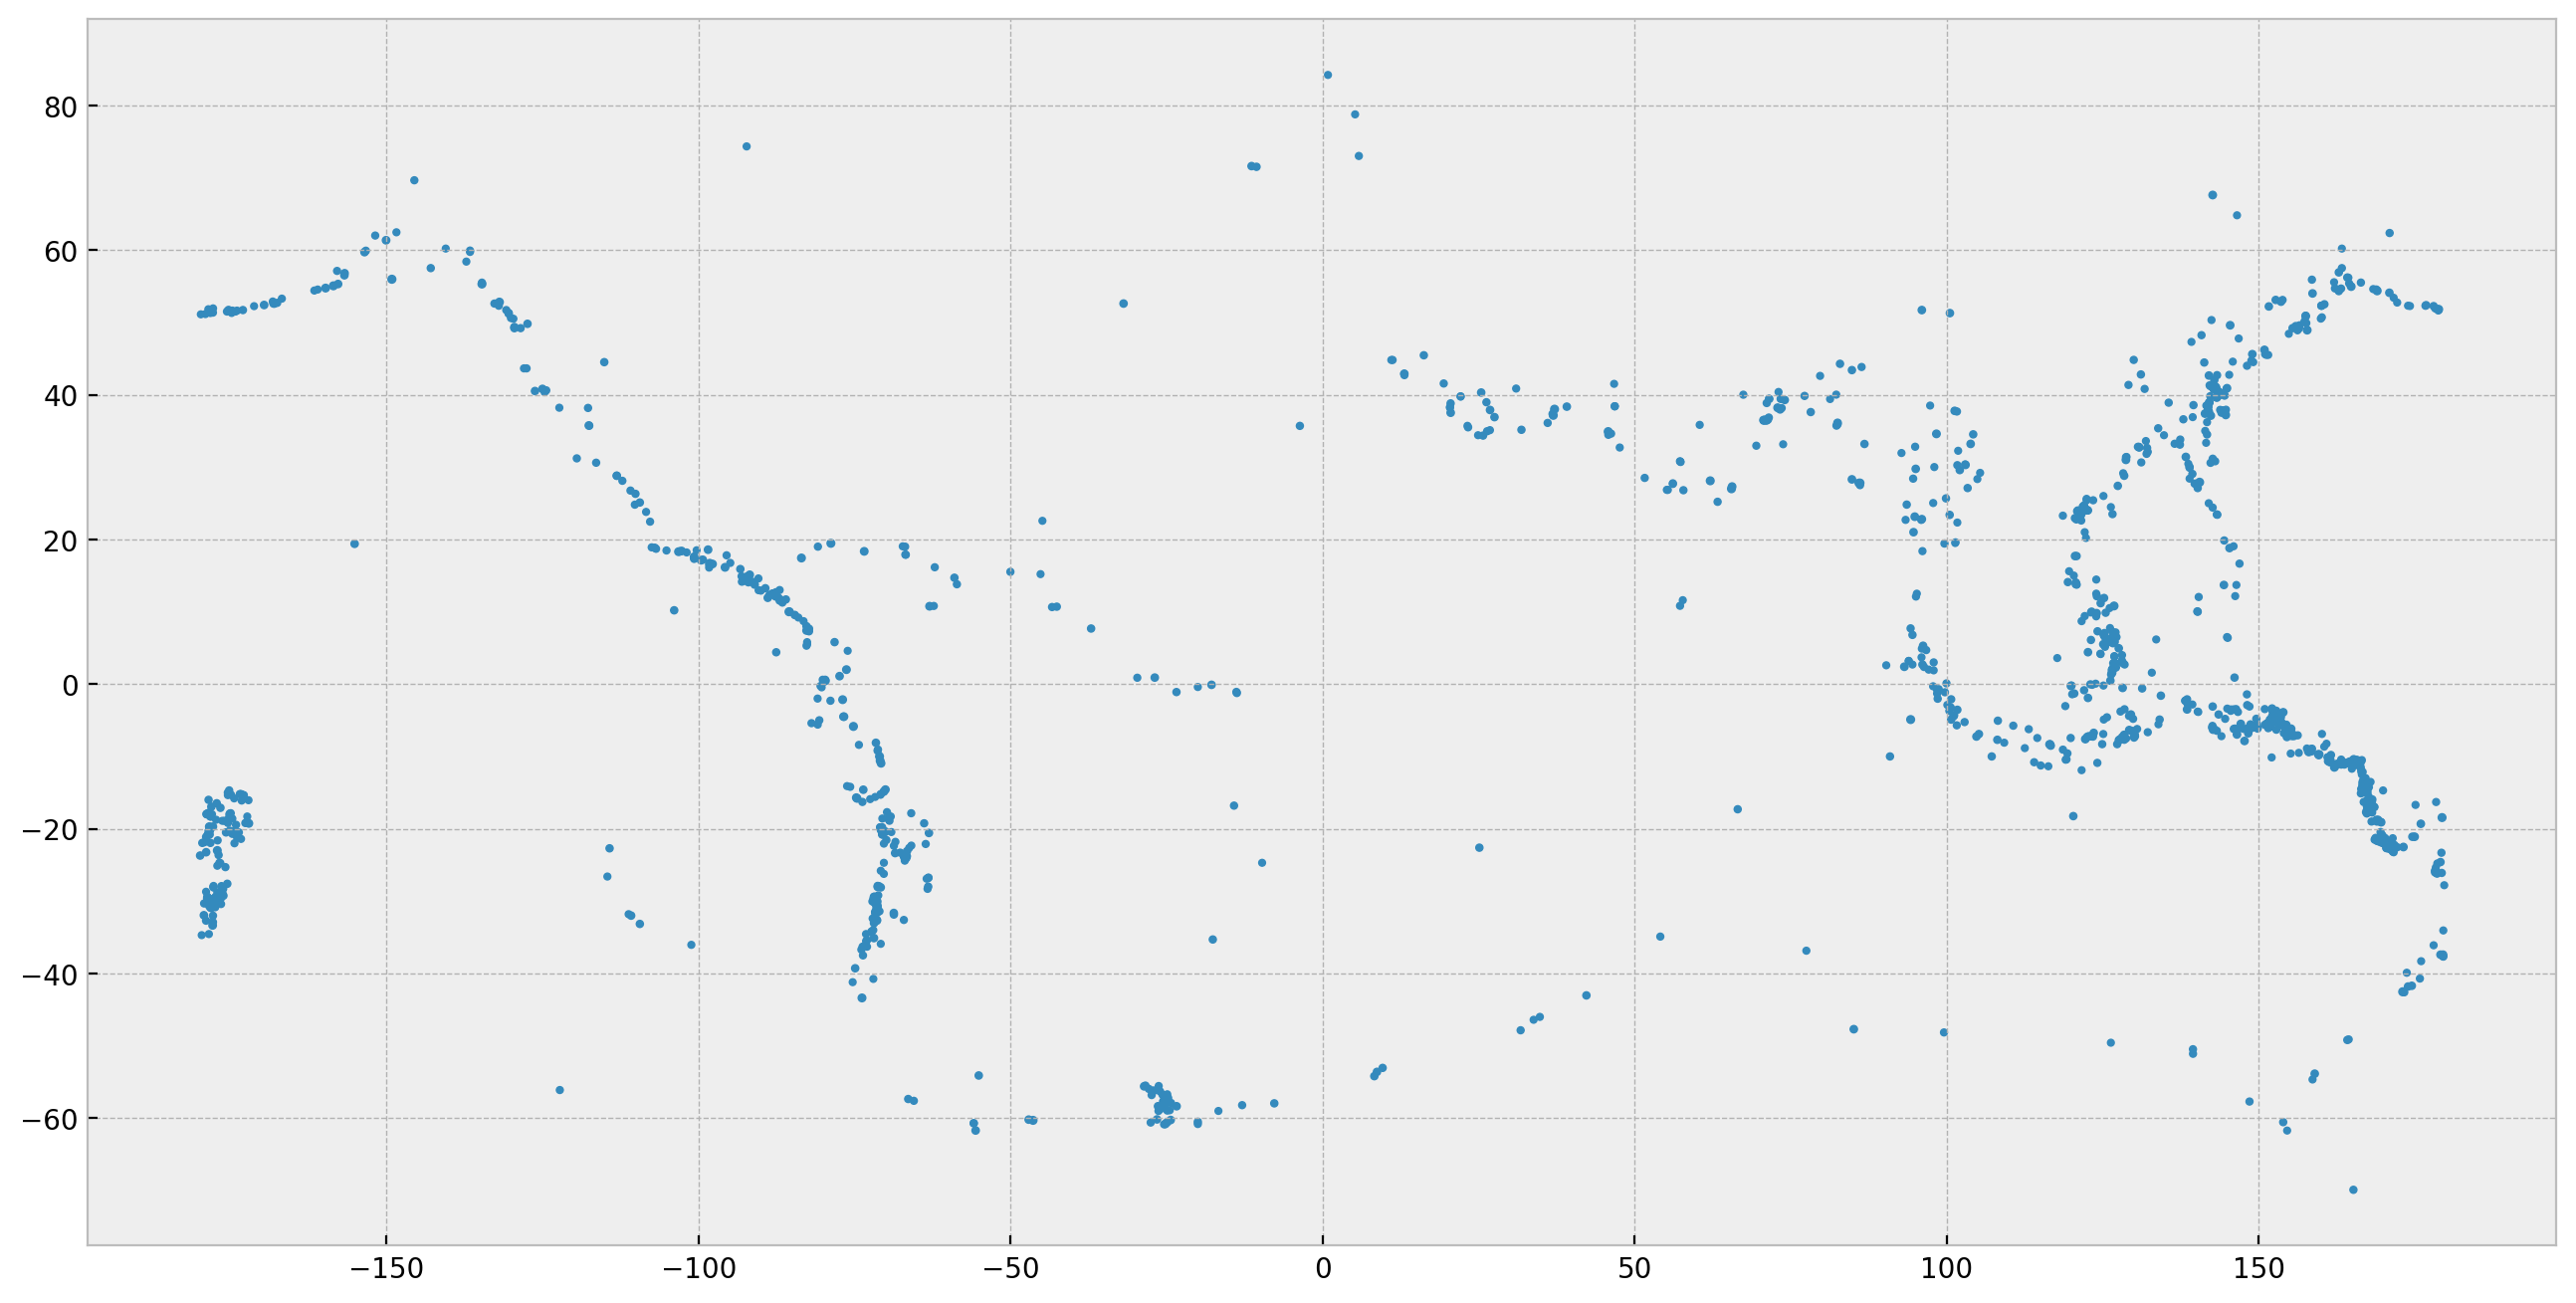

In [41]:
data_57=data.loc[(data.iloc[:,1]>=6 ) &(data.iloc[:,1]<=8 )]#提起data中列中某个范围内的左右数据
# print(data_57)
longitude=data_57.iloc[:,3]#经度
latitude=data_57.iloc[:,2]#纬度
deepth=data_57.iloc[:,4]#震源深度
magnitude=data_57.iloc[:,1]#地震等级
# print(longitude,latitude,deepth)
%config InlineBackend.figure_format='retina'
fig,ax=plt.subplots(figsize=(16,8))
ax.scatter(longitude,latitude,magnitude)#存在问题大小size不明显
plt.show()


根据震级范围给颜色

In [42]:
# sourcery skip: remove-redundant-if
import pandas as pd
data=pd.read_excel('D:/code/Python Code/data/earthquake_data/earthquake_data.xlsx')
# data=data.iloc[0:100,:]
data['color']=''#新增加空列
# print(data)
def select(x):#颜等级函数
    if 1<=x<2:
        return 'lightgray'
    elif 2<=x<3:
        return 'darkgrey'
    elif 3<=x<4:
        return 'lightgreen'
    elif 4<=x<5:
        return 'limegreen'
    elif 5<=x<6:
        return 'darkorange'
    elif 6<=x<7:
        return 'indianred'
    elif 7<=x<8:
        return 'darkred'
    elif 8<=x<9:
        return 'indigo'
data['color']=data['震级(M)'].apply(select)#apply用法

# data['color'].loc[(data['震级(M)']>=1) &( data['震级(M)']<2)]='lightgray'
# data['color'].loc[(data['震级(M)']>=2) &( data['震级(M)']<3)]='darkgrey'
# data['color'].loc[(data['震级(M)']>=3) &( data['震级(M)']<4)]='lightgreen'
# data['color'].loc[(data['震级(M)']>=4) &( data['震级(M)']<5)]='limegreen'
# data['color'].loc[(data['震级(M)']>=5) &( data['震级(M)']<6)]='darkorange'
# data['color'].loc[(data['震级(M)']>=6) &( data['震级(M)']<7)]='indianred'
# data['color'].loc[(data['震级(M)']>=7) &( data['震级(M)']<8)]='darkred'
# data['color'].loc[(data['震级(M)']>=8) &( data['震级(M)']<10)]='indigo'

print('///////')
data.to_excel('D:/code/Python Code/data/earthquake_data/data_test.xlsx')

///////


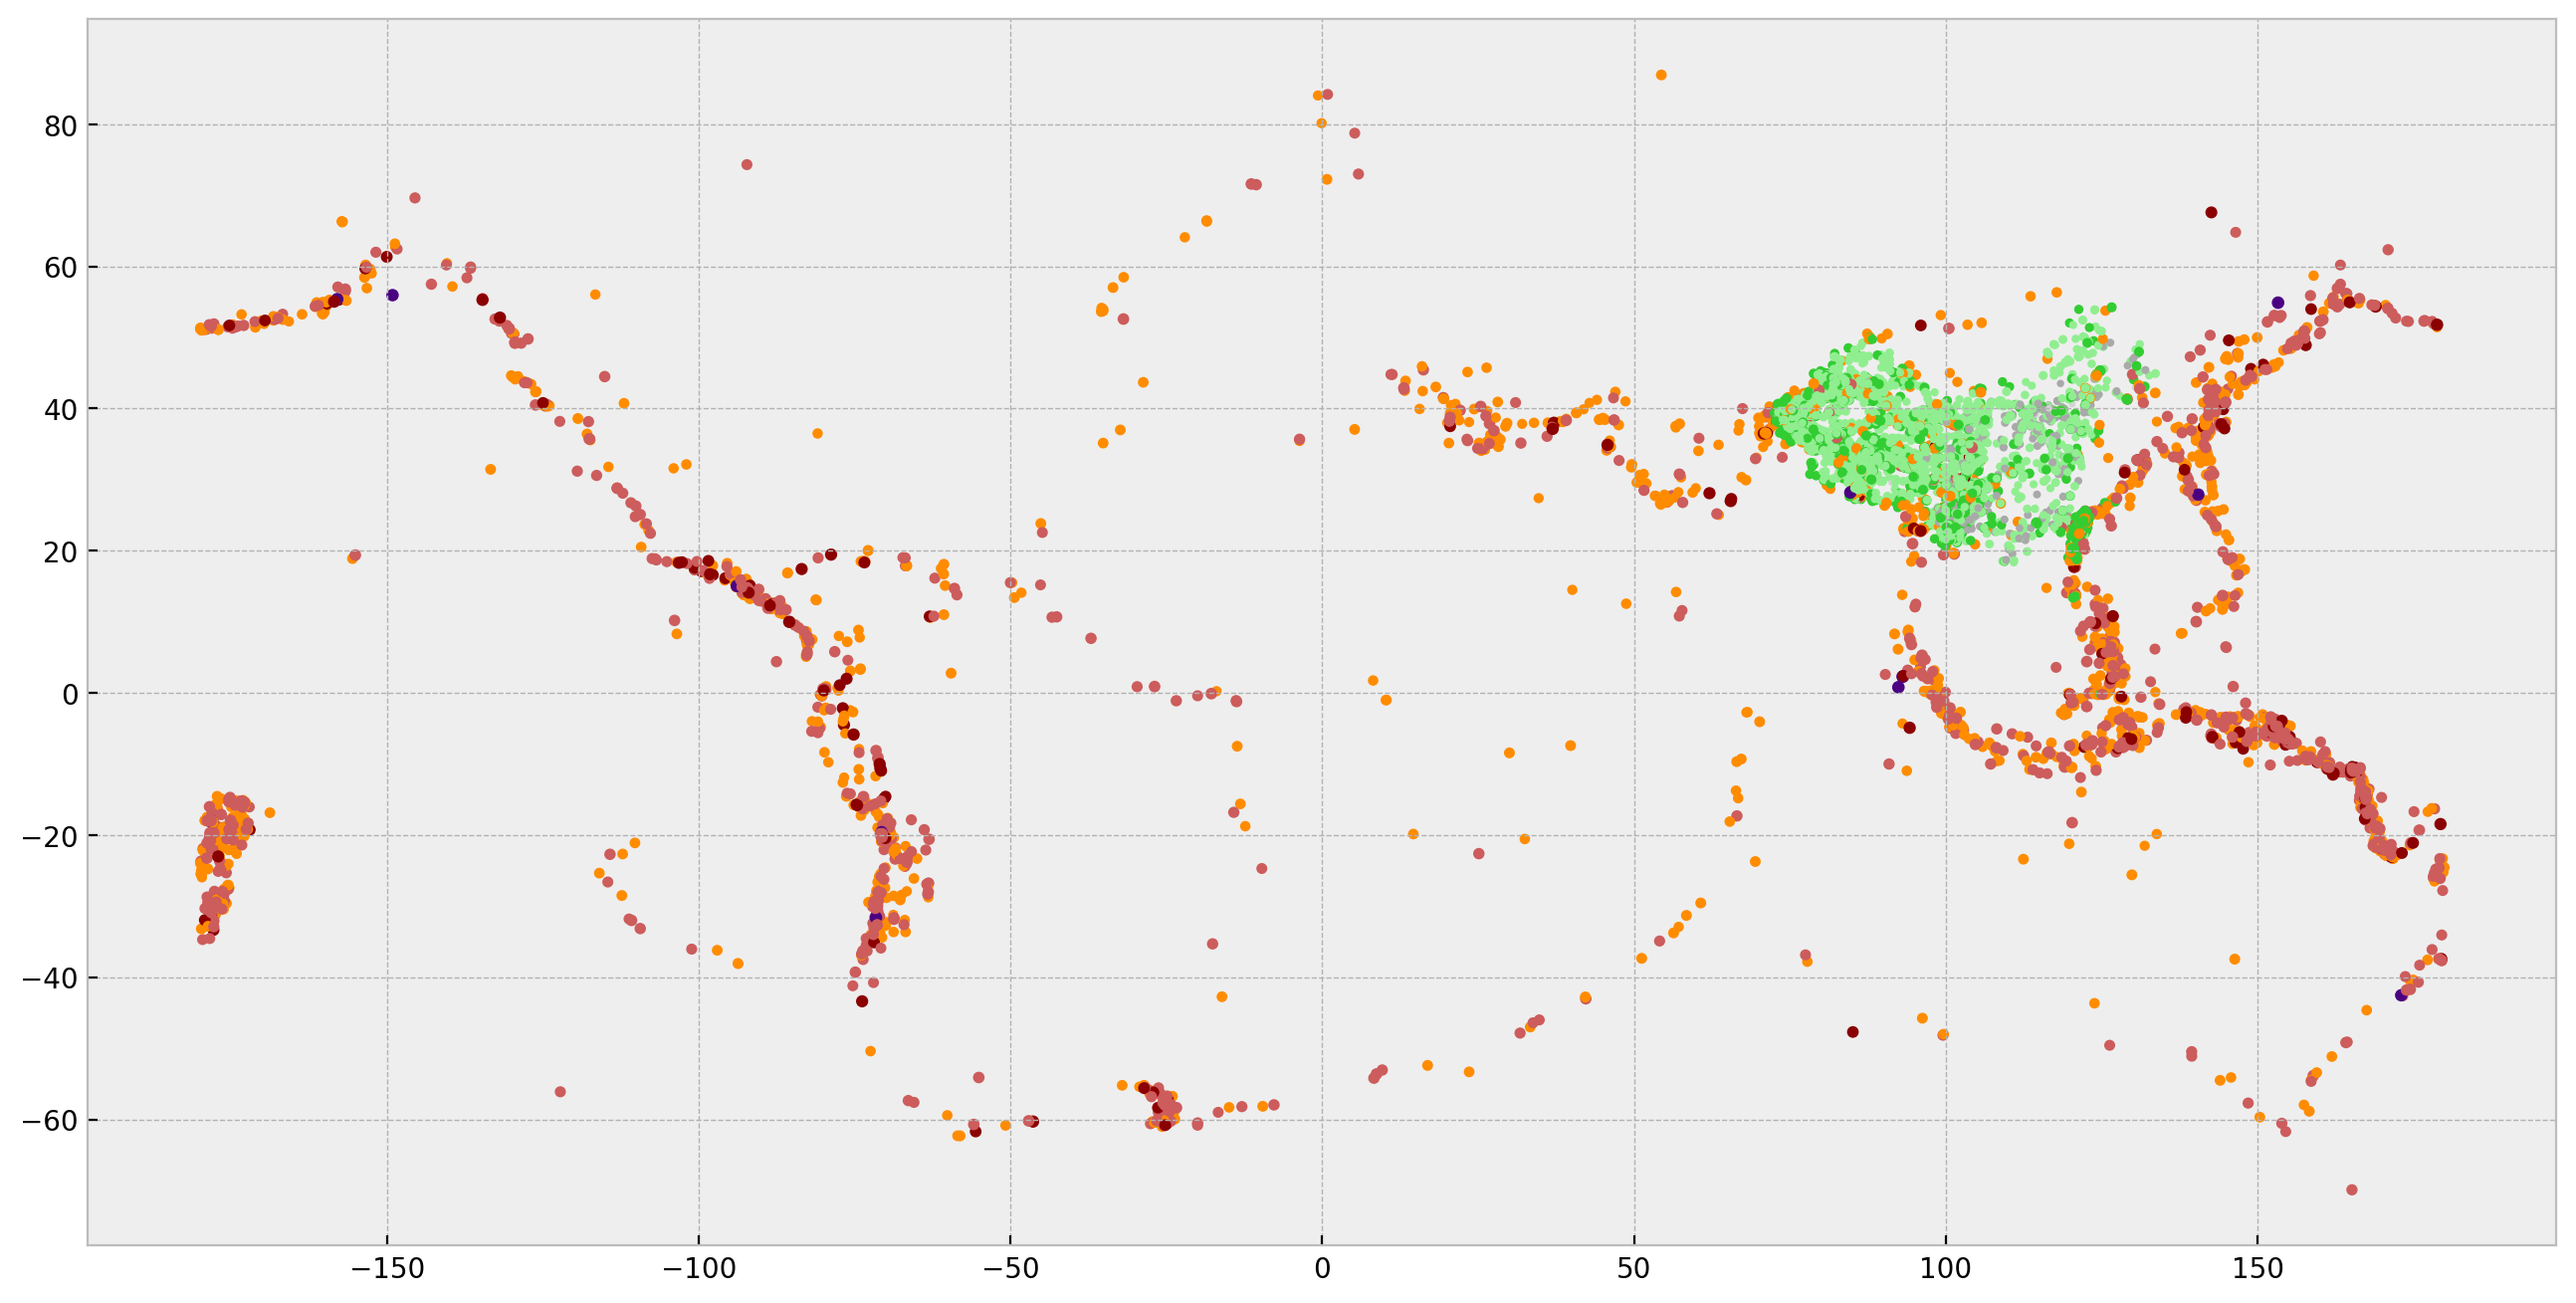

In [44]:
import matplotlib.pyplot as plt

plt.style.use('bmh')
%config InlineBackend.figure_format='retina'
# %config InlineBackend.figure_format='svg'#设置图片格式# 

longitude=data.iloc[:,3]#经度
latitude=data.iloc[:,2]#纬度
deepth=data.iloc[:,4]#震源深度
magnitude=data.iloc[:,1]#地震等级
colors=data['color']#颜色
fig,ax=plt.subplots(figsize=(16,8))
ax.scatter(longitude,latitude,s=magnitude*2,c=colors)#存在问题大小size不明显



# plt.legend()
plt.show()

In [ ]:
print(data.shape)

增加底图geopandas

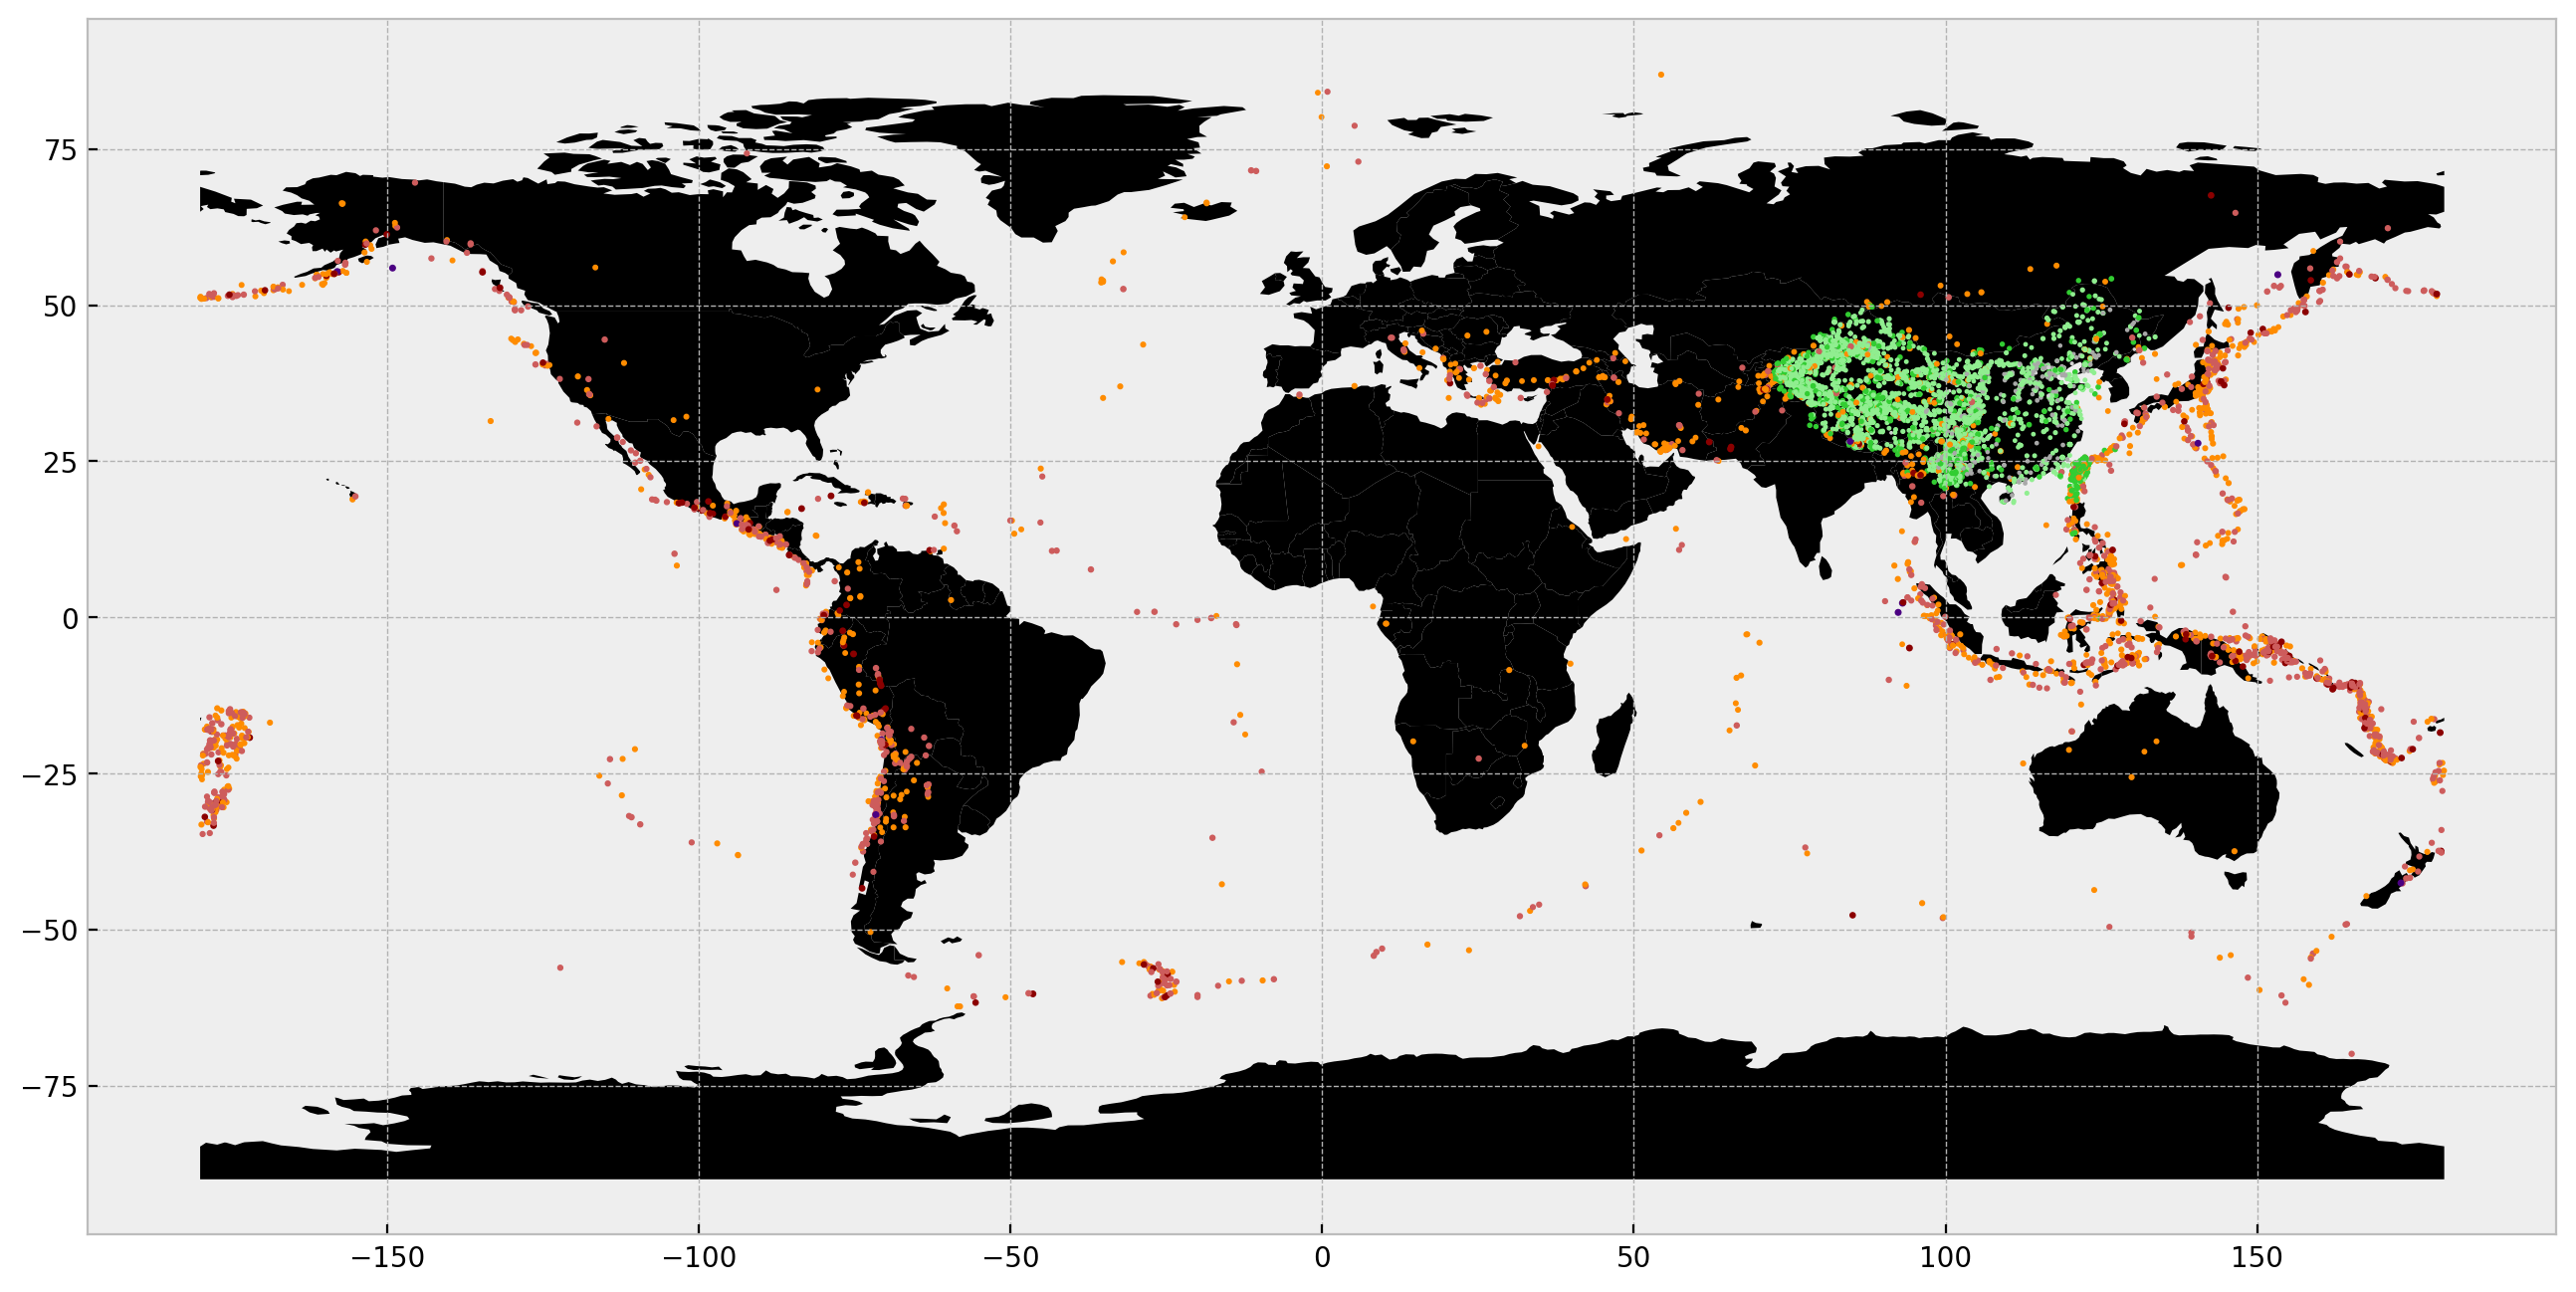

In [48]:
import geopandas as gp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
# %config InlineBackend.figure_format='svg'#设置图片格式# 

world=gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
world.plot(color='black',figsize=(16,8))#底图

plt.scatter(longitude,latitude,s=magnitude*0.5,c=colors)#散点

plt.show()